# Projecting the stability / instability of the country

Here we are trying to project each and every component that refers to the instability of the country which we are focussing on. The Facebook's Prophet library is a perfect tool in such a case. Here is the trend of a variable is going upwards means the country is becoming unstable/deterioting and the vice versa is also true.

In [1]:
import pandas as pd
import datetime as dt

In [2]:
df2006 = pd.read_excel('fsi-2006.xlsx', engine='openpyxl')
df2007 = pd.read_excel('fsi-2007.xlsx', engine='openpyxl')
df2008 = pd.read_excel('fsi-2008.xlsx', engine='openpyxl')
df2009 = pd.read_excel('fsi-2009.xlsx', engine='openpyxl')
df2010 = pd.read_excel('fsi-2010.xlsx', engine='openpyxl')
df2011 = pd.read_excel('fsi-2011.xlsx', engine='openpyxl')
df2012 = pd.read_excel('fsi-2012.xlsx', engine='openpyxl')
df2013 = pd.read_excel('fsi-2013.xlsx', engine='openpyxl')
df2014 = pd.read_excel('fsi-2014.xlsx', engine='openpyxl')
df2015 = pd.read_excel('fsi-2015.xlsx', engine='openpyxl')
df2016 = pd.read_excel('fsi-2016.xlsx', engine='openpyxl')
df2017 = pd.read_excel('fsi-2017.xlsx', engine='openpyxl')
df2018 = pd.read_excel('fsi-2018.xlsx', engine='openpyxl')
df2019 = pd.read_excel('fsi-2019.xlsx', engine='openpyxl')
df2020 = pd.read_excel('fsi-2020.xlsx', engine='openpyxl')

In [3]:
dataframes = [df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, 
             df2017, df2018, df2019, df2020]

In [4]:
fsi6_20_df = pd.concat(dataframes)

In [5]:
fsi6_20_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12060 entries, 0 to 2098
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country                           2633 non-null   object        
 1   Year                              2633 non-null   datetime64[ns]
 2   Rank                              2633 non-null   object        
 3   Total                             2633 non-null   float64       
 4   C1: Security Apparatus            2633 non-null   float64       
 5   C2: Factionalized Elites          2633 non-null   float64       
 6   C3: Group Grievance               2633 non-null   float64       
 7   E1: Economy                       2633 non-null   float64       
 8   E2: Economic Inequality           2633 non-null   float64       
 9   E3: Human Flight and Brain Drain  2633 non-null   float64       
 10  P1: State Legitimacy              2633 non-null

In [6]:
# Deleting  the coloumn which has NaN values.
del fsi6_20_df['Change from Previous Year']
del fsi6_20_df['Rank']
del fsi6_20_df['Unnamed: 17']
del fsi6_20_df['Unnamed: 18']
del fsi6_20_df['Unnamed: 19']
del fsi6_20_df['Unnamed: 20']
del fsi6_20_df['Unnamed: 21']
del fsi6_20_df['Unnamed: 22']
del fsi6_20_df['Unnamed: 23']
del fsi6_20_df['Unnamed: 24']
del fsi6_20_df['Unnamed: 25']
del fsi6_20_df['Unnamed: 26']
del fsi6_20_df['Unnamed: 27']
del fsi6_20_df['Unnamed: 28']
del fsi6_20_df['Unnamed: 29']
del fsi6_20_df['Unnamed: 30']
del fsi6_20_df['Unnamed: 31']
del fsi6_20_df['Unnamed: 32']
del fsi6_20_df['Unnamed: 33']
del fsi6_20_df['Unnamed: 34']
del fsi6_20_df['Unnamed: 35']
del fsi6_20_df['Unnamed: 36']
del fsi6_20_df['Unnamed: 37']
del fsi6_20_df['Unnamed: 38']

In [7]:
fsi6_20_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12060 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country                           2633 non-null   object        
 1   Year                              2633 non-null   datetime64[ns]
 2   Total                             2633 non-null   float64       
 3   C1: Security Apparatus            2633 non-null   float64       
 4   C2: Factionalized Elites          2633 non-null   float64       
 5   C3: Group Grievance               2633 non-null   float64       
 6   E1: Economy                       2633 non-null   float64       
 7   E2: Economic Inequality           2633 non-null   float64       
 8   E3: Human Flight and Brain Drain  2633 non-null   float64       
 9   P1: State Legitimacy              2633 non-null   float64       
 10  P2: Public Services               2633 non-null

In [8]:
countries = list(fsi6_20_df.Country.unique())

In [9]:
df = fsi6_20_df.copy()

#### Creating a Dictionary w.r.t each and every country 
Here we are creating a dictionary whose key is the name of the country and the value is the dataframe associated with it that contains all the variables. 

In [10]:
countriesDict = {name: df[df.Country.eq(name)] for name in countries}

In [11]:
countriesDict["India"]

Country       Year      Total  C1: Security Apparatus  \
92    India 2006-01-01  70.400000                4.500000   
109   India 2007-01-01  70.800000                5.000000   
97    India 2008-01-01  72.900000                6.600000   
86    India 2009-01-01  77.800000                7.100000   
78    India 2010-01-01  79.200000                7.600000   
75    India 2011-01-01  79.300000                7.800000   
78    India 2012-01-01  78.000000                7.500000   
78    India 2013-01-01  77.500000                7.800000   
80    India 2014-01-01  76.900000                7.900000   
68    India 2015-01-01  79.300000                7.900000   
69    India 2016-01-01  79.600000                7.600000   
71    India 2017-01-01  77.900000                7.400000   
71    India 2018-01-01  76.308510                7.100000   
73    India 2019-01-01  74.400000                7.200000   
67    India 2020-01-01  75.307433                6.907433   

     C2: Factionalized Elites  C3: Group Grievance  E1: Economy  \
92                        5.7                  6.9     5.000000   
109                       5.6                  7.0     4.600000   
97                        6.0                  7.0     4.600000   
86                        6.0                  7.3     5.000000   
78                        6.2                  7.8     5.100000   
75                        6.8                  8.2     5.400000   
78                        6.8                  7.9     5.500000   
78                        6.8                  8.2     5.400000   
80                        6.8                  7.8     5.700000   
68                        7.3                  8.3     5.600000   
69                        7.3                  8.5     5.300000   
71                        7.3                  8.3     5.100000   
71                        7.3                  8.3     5.021057   
73                        7.3                  8.0     5.300000   
67                        7.3                  8.5     5.600000   

     E2: Economic Inequality  E3: Human Flight and Brain Drain  \
92                       8.5                           7.10000   
109                      8.9                           7.10000   
97                       8.9                           6.90000   
86                       8.9                           6.70000   
78                       8.7                           6.50000   
75                       8.5                           6.20000   
78                       8.4                           5.90000   
78                       8.1                           5.40000   
80                       7.8                           5.20000   
68                       7.5                           5.50000   
69                       7.2                           5.80000   
71                       7.0                           6.10000   
71                       6.7                           6.39822   
73                       6.4                           6.10000   
67                       6.1                           5.80000   

     P1: State Legitimacy  P2: Public Services  P3: Human Rights  \
92                    4.8                  6.7          5.400000   
109                   4.8                  6.7          5.400000   
97                    4.8                  6.7          6.000000   
86                    5.5                  7.0          6.000000   
78                    5.8                  7.2          6.100000   
75                    5.8                  7.2          5.900000   
78                    5.5                  6.9          5.800000   
78                    5.2                  6.7          5.900000   
80                    5.3                  7.0          5.600000   
68                    5.2                  7.5          5.900000   
69                    4.9                  7.6          6.200000   
71                    4.7                  7.4          6.000000   
71           

In [12]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode(connected=True)

In [13]:
df_india = countriesDict["India"]

In [14]:
df_india.set_index('Year')

Country      Total  C1: Security Apparatus  \
Year                                                    
2006-01-01   India  70.400000                4.500000   
2007-01-01   India  70.800000                5.000000   
2008-01-01   India  72.900000                6.600000   
2009-01-01   India  77.800000                7.100000   
2010-01-01   India  79.200000                7.600000   
2011-01-01   India  79.300000                7.800000   
2012-01-01   India  78.000000                7.500000   
2013-01-01   India  77.500000                7.800000   
2014-01-01   India  76.900000                7.900000   
2015-01-01   India  79.300000                7.900000   
2016-01-01   India  79.600000                7.600000   
2017-01-01   India  77.900000                7.400000   
2018-01-01   India  76.308510                7.100000   
2019-01-01   India  74.400000                7.200000   
2020-01-01   India  75.307433                6.907433   

            C2: Factionalized Elites  C3: Group Grievance  E1: Economy  \
Year                                                                     
2006-01-01                       5.7                  6.9     5.000000   
2007-01-01                       5.6                  7.0     4.600000   
2008-01-01                       6.0                  7.0     4.600000   
2009-01-01                       6.0                  7.3     5.000000   
2010-01-01                       6.2                  7.8     5.100000   
2011-01-01                       6.8                  8.2     5.400000   
2012-01-01                       6.8                  7.9     5.500000   
2013-01-01                       6.8                  8.2     5.400000   
2014-01-01                       6.8                  7.8     5.700000   
2015-01-01                       7.3                  8.3     5.600000   
2016-01-01                       7.3                  8.5     5.300000   
2017-01-01                       7.3                  8.3     5.100000   
2018-01-01                       7.3                  8.3     5.021057   
2019-01-01                       7.3                  8.0     5.300000   
2020-01-01                       7.3                  8.5     5.600000   

            E2: Economic Inequality  E3: Human Flight and Brain Drain  \
Year                                                                    
2006-01-01                      8.5                           7.10000   
2007-01-01                      8.9                           7.10000   
2008-01-01                      8.9                           6.90000   
2009-01-01                      8.9                           6.70000   
2010-01-01                      8.7                           6.50000   
2011-01-01                      8.5                           6.20000   
2012-01-01                      8.4                           5.90000   
2013-01-01                      8.1                           5.40000   
2014-01-01                      7.8                           5.20000   
2015-01-01                      7.5                           5.50000   
2016-01-01                      7.2                           5.80000   
2017-01-01                      7.0                           6.10000   
2018-01-01                      6.7                           6.39822   
2019-01-01                      6.4                           6.10000   
2020-01-01                      6.1                           5.80000   

            P1: State Legitimacy  P2: Public Services  P3: Human Rights  \
Year                                                                      
2006-01-01                   4.8                  6.7          5.400000   
2007-01-01                   4.8                  6.7          5.400000   
2008-01-01                   4.8                  6.7          6.000000   
2009-01-01                   5.5                  7.0          6.000000   
2010-01-01                   5.8                  7.2          6.100000   
2011-01-01     

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>], dtype=object)

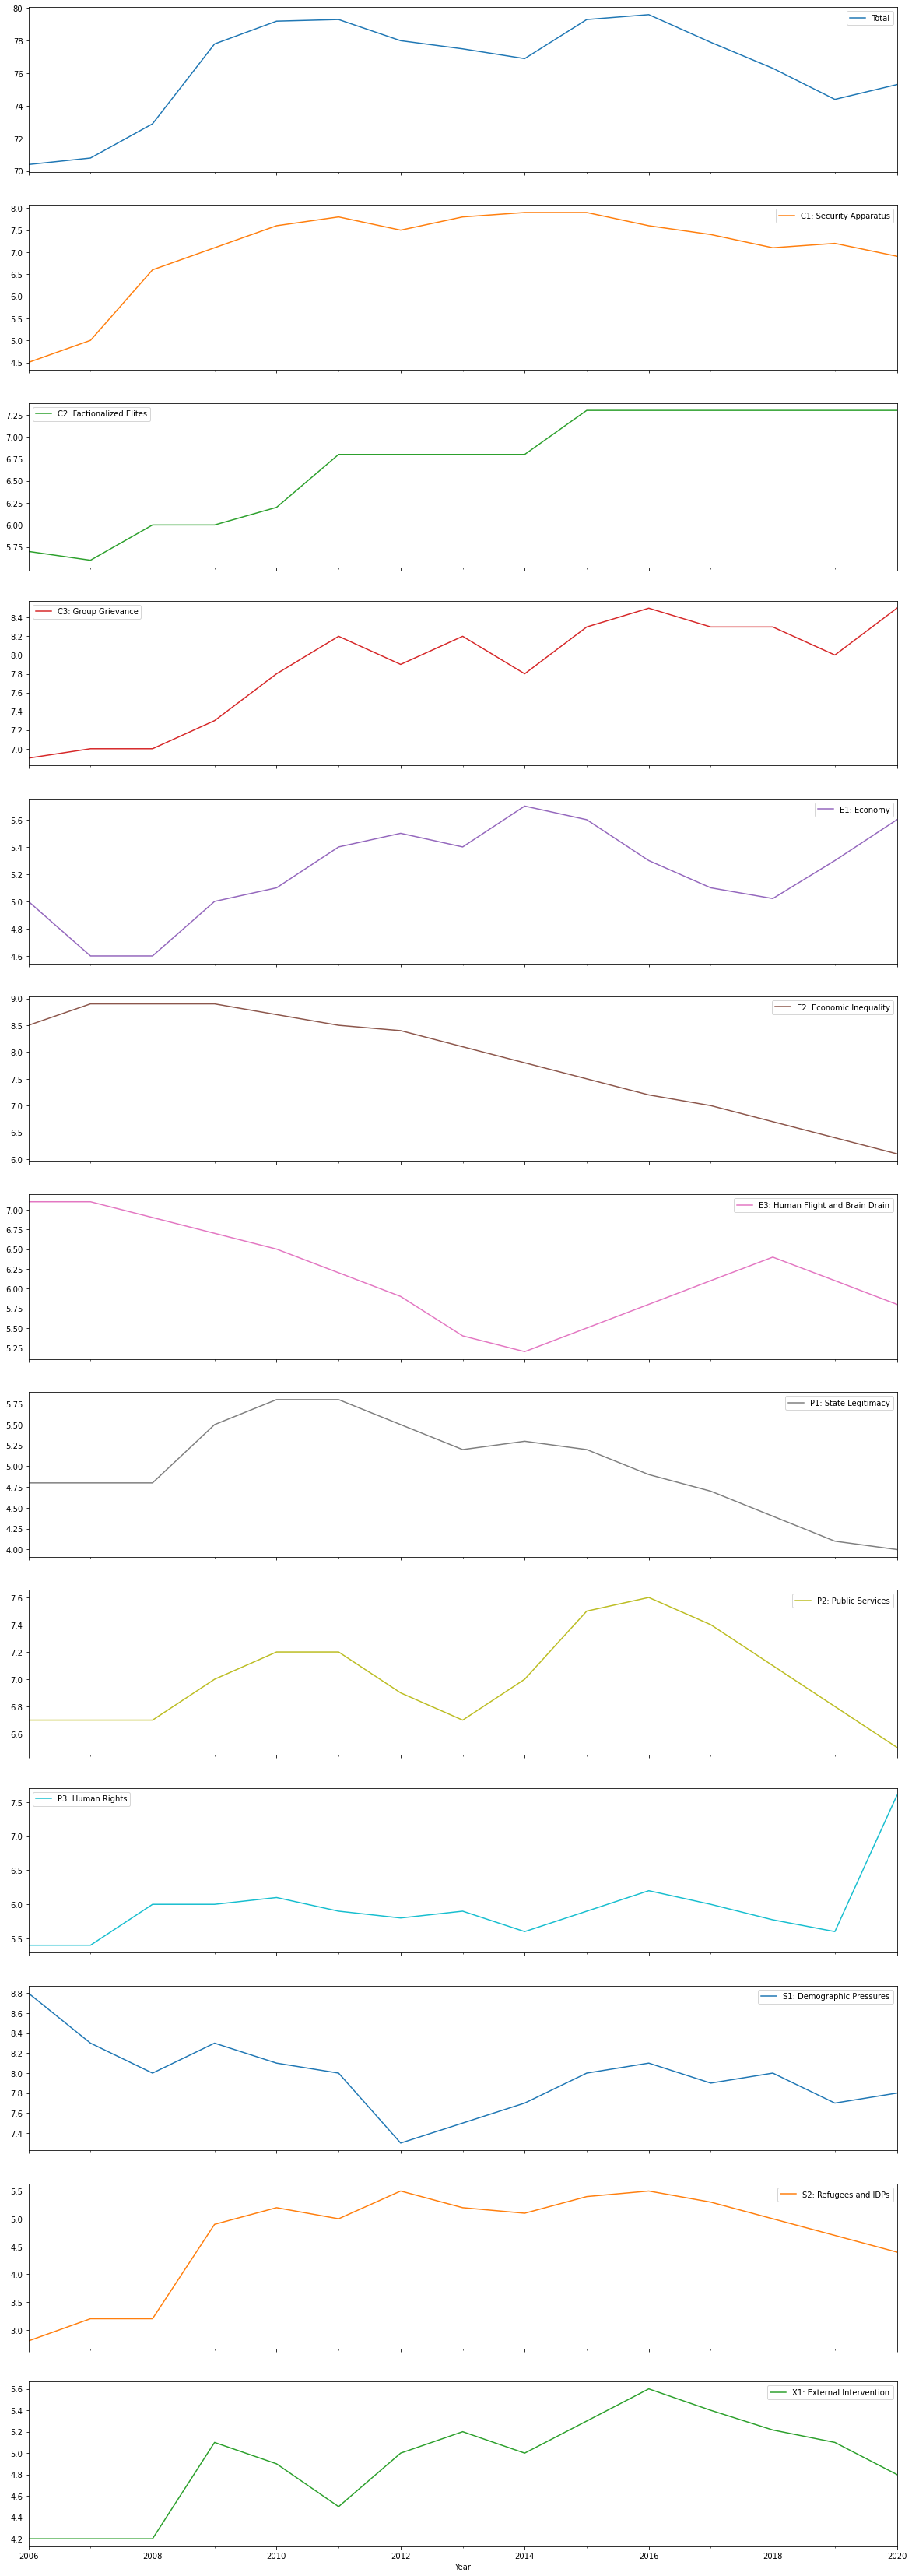

In [15]:
df_india.set_index('Year')[['Total', 'C1: Security Apparatus',
       'C2: Factionalized Elites', 'C3: Group Grievance', 'E1: Economy',
       'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
       'S1: Demographic Pressures', 'S2: Refugees and IDPs',
       'X1: External Intervention']].plot(subplots = True, figsize=(20, 60), label = 'India')

In [16]:
# install prophet library using this command    conda install -c conda-forge fbprophet
from fbprophet import Prophet

In [17]:
df_india.reset_index()

index Country       Year      Total  C1: Security Apparatus  \
0      92   India 2006-01-01  70.400000                4.500000   
1     109   India 2007-01-01  70.800000                5.000000   
2      97   India 2008-01-01  72.900000                6.600000   
3      86   India 2009-01-01  77.800000                7.100000   
4      78   India 2010-01-01  79.200000                7.600000   
5      75   India 2011-01-01  79.300000                7.800000   
6      78   India 2012-01-01  78.000000                7.500000   
7      78   India 2013-01-01  77.500000                7.800000   
8      80   India 2014-01-01  76.900000                7.900000   
9      68   India 2015-01-01  79.300000                7.900000   
10     69   India 2016-01-01  79.600000                7.600000   
11     71   India 2017-01-01  77.900000                7.400000   
12     71   India 2018-01-01  76.308510                7.100000   
13     73   India 2019-01-01  74.400000                7.200000   
14     67   India 2020-01-01  75.307433                6.907433   

    C2: Factionalized Elites  C3: Group Grievance  E1: Economy  \
0                        5.7                  6.9     5.000000   
1                        5.6                  7.0     4.600000   
2                        6.0                  7.0     4.600000   
3                        6.0                  7.3     5.000000   
4                        6.2                  7.8     5.100000   
5                        6.8                  8.2     5.400000   
6                        6.8                  7.9     5.500000   
7                        6.8                  8.2     5.400000   
8                        6.8                  7.8     5.700000   
9                        7.3                  8.3     5.600000   
10                       7.3                  8.5     5.300000   
11                       7.3                  8.3     5.100000   
12                       7.3                  8.3     5.021057   
13                       7.3                  8.0     5.300000   
14                       7.3                  8.5     5.600000   

    E2: Economic Inequality  E3: Human Flight and Brain Drain  \
0                       8.5                           7.10000   
1                       8.9                           7.10000   
2                       8.9                           6.90000   
3                       8.9                           6.70000   
4                       8.7                           6.50000   
5                       8.5                           6.20000   
6                       8.4                           5.90000   
7                       8.1                           5.40000   
8                       7.8                           5.20000   
9                       7.5                           5.50000   
10                      7.2                           5.80000   
11                      7.0                           6.10000   
12                      6.7                           6.39822   
13                      6.4                           6.10000   
14                      6.1                           5.80000   

    P1: State Legitimacy  P2: Public Services  P3: Human Rights  \
0                    4.8                  6.7          5.400000   
1                    4.8                  6.7          5.400000   
2                    4.8                  6.7          6.000000   
3                    5.5                  7.0          6.000000   
4                    5.8                  7.2          6.100000   
5                    5.8                  7.2          5.900000   
6                    5.5                  6.9          5.800000   
7                    5.2                  6.7          5.900000   
8                    5.3                  7.0          5.600000   
9                    5.2                  7.5          5.900000   
10                   4.9                  7.6          6.200000   
11                   4.7     

In [18]:
df_india.columns

Index(['Country', 'Year', 'Total', 'C1: Security Apparatus',
       'C2: Factionalized Elites', 'C3: Group Grievance', 'E1: Economy',
       'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
       'S1: Demographic Pressures', 'S2: Refugees and IDPs',
       'X1: External Intervention'],
      dtype='object')

In [19]:
df_1 = df_india[['Year', 'Total']]

In [20]:
df_c1 = df_india[['Year', 'C1: Security Apparatus']]

In [21]:
df_c2 = df_india[['Year', 'C2: Factionalized Elites']]

In [22]:
df_c3 = df_india[['Year', 'C3: Group Grievance']]

In [23]:
df_e1 = df_india[['Year', 'E1: Economy']]

In [24]:
df_e2 = df_india[['Year', 'E2: Economic Inequality']]

In [25]:
df_e3 = df_india[['Year', 'E3: Human Flight and Brain Drain']]

In [26]:
df_p1 = df_india[['Year', 'P1: State Legitimacy']]

In [27]:
df_p2 = df_india[['Year', 'P2: Public Services']]

In [28]:
df_p3 = df_india[['Year', 'P3: Human Rights']]

In [29]:
df_s1 = df_india[['Year', 'S1: Demographic Pressures']]

In [30]:
df_s2 = df_india[['Year', 'S2: Refugees and IDPs']]

In [31]:
df_x1 = df_india[['Year', 'X1: External Intervention']]

In [32]:
df_1.columns = ['ds','y']

In [33]:
df_c1.columns = ['ds','y']

In [34]:
df_c2.columns = ['ds','y']

In [35]:
df_c3.columns = ['ds','y']

In [36]:
df_e1.columns = ['ds','y']

In [37]:
df_e2.columns = ['ds','y']

In [38]:
df_e3.columns = ['ds','y']

In [39]:
df_p1.columns = ['ds','y']

In [40]:
df_p2.columns = ['ds','y']

In [41]:
df_p3.columns = ['ds','y']

In [42]:
df_s1.columns = ['ds','y']

In [43]:
df_s2.columns = ['ds','y']

In [44]:
df_x1.columns = ['ds','y']

In [45]:
df_1.reset_index(drop = True)

ds          y
0  2006-01-01  70.400000
1  2007-01-01  70.800000
2  2008-01-01  72.900000
3  2009-01-01  77.800000
4  2010-01-01  79.200000
5  2011-01-01  79.300000
6  2012-01-01  78.000000
7  2013-01-01  77.500000
8  2014-01-01  76.900000
9  2015-01-01  79.300000
10 2016-01-01  79.600000
11 2017-01-01  77.900000
12 2018-01-01  76.308510
13 2019-01-01  74.400000
14 2020-01-01  75.307433

In [46]:
model1 = Prophet()

In [47]:
modelc1 = Prophet()

In [48]:
modelc2 = Prophet()

In [49]:
modelc3 = Prophet()

In [50]:
modele1 = Prophet()

In [51]:
modele2 = Prophet()

In [52]:
modele3 = Prophet()

In [53]:
modelp1 = Prophet()

In [54]:
modelp2 = Prophet()

In [55]:
modelp3 = Prophet()

In [56]:
models1 = Prophet()

In [57]:
models2 = Prophet()

In [58]:
modelx1 = Prophet()

In [59]:
model1.fit(df_1)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [60]:
modelc1.fit(df_c1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [61]:
modelc2.fit(df_c2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [62]:
modelc3.fit(df_c3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [63]:
modele1.fit(df_e1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [64]:
modele2.fit(df_e2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [65]:
modele3.fit(df_e3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [66]:
modelp1.fit(df_p1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [67]:
modelp2.fit(df_p2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [68]:
modelp3.fit(df_p3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [69]:
models1.fit(df_s1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [70]:
models2.fit(df_s2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [71]:
modelx1.fit(df_x1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [72]:
future1 = model1.make_future_dataframe(periods = 5, freq = 'YS')

In [73]:
futurec1 = modelc1.make_future_dataframe(periods = 5, freq = 'YS')

In [74]:
futurec2 = modelc2.make_future_dataframe(periods = 5, freq = 'YS')

In [75]:
futurec3 = modelc3.make_future_dataframe(periods = 5, freq = 'YS')

In [76]:
futuree1 = modele1.make_future_dataframe(periods = 5, freq = 'YS')

In [77]:
futuree2 = modele2.make_future_dataframe(periods = 5, freq = 'YS')

In [78]:
futuree3 = modele3.make_future_dataframe(periods = 5, freq = 'YS')

In [79]:
futurep1 = modelp1.make_future_dataframe(periods = 5, freq = 'YS')

In [80]:
futurep2 = modelp2.make_future_dataframe(periods = 5, freq = 'YS')

In [81]:
futurep3 = modelp3.make_future_dataframe(periods = 5, freq = 'YS')

In [82]:
futures1 = models1.make_future_dataframe(periods = 5, freq = 'YS')

In [83]:
futures2 = models2.make_future_dataframe(periods = 5, freq = 'YS')

In [84]:
futurex1 = modelx1.make_future_dataframe(periods = 5, freq = 'YS')

In [85]:
df_1.tail()

ds          y
69 2016-01-01  79.600000
71 2017-01-01  77.900000
71 2018-01-01  76.308510
73 2019-01-01  74.400000
67 2020-01-01  75.307433

In [86]:
future1.tail()

ds
15 2021-01-01
16 2022-01-01
17 2023-01-01
18 2024-01-01
19 2025-01-01

In [87]:
len(df_1)

15

In [88]:
len(future1)

20


### Step 2: Predict and fill in the Future

In [89]:
forecast1 = model1.predict(future1)

In [90]:
forecastc1 = modelc1.predict(futurec1)

In [91]:
forecastc2 = modelc2.predict(futurec2)

In [92]:
forecastc3 = modelc3.predict(futurec3)

In [93]:
forecaste1 = modele1.predict(futuree1)

In [94]:
forecaste2 = modele2.predict(futuree2)

In [95]:
forecaste3 = modele3.predict(futuree3)

In [96]:
forecastp1 = modelp1.predict(futurep1)

In [97]:
forecastp2 = modelp2.predict(futurep2)

In [98]:
forecastp3 = modelp3.predict(futurep3)

In [99]:
forecasts1 = models1.predict(futures1)

In [100]:
forecasts2 = models2.predict(futures2)

In [101]:
forecastx1 = modelx1.predict(futurex1)

In [102]:
forecast1.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
15 2021-01-01  23.887509   73.554634   76.177935    23.738688    24.019926   
16 2022-01-01  23.159976   72.200956   75.080460    22.640539    23.706359   
17 2023-01-01  22.432443   71.114025   74.554713    21.342976    23.434723   
18 2024-01-01  21.704909   70.022429   74.324076    20.014713    23.274206   
19 2025-01-01  20.975383   69.086740   74.573138    18.446777    23.225382   

    additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
15       50.971243             50.971243             50.971243  50.971243   
16       50.498741             50.498741             50.498741  50.498741   
17       50.360130             50.360130             50.360130  50.360130   
18       50.555538             50.555538             50.555538  50.555538   
19       50.971243             50.971243             50.971243  50.971243   

    yearly_lower  yearly_upper  multiplicative_terms  \
15     50.971243     50.971243                   0.0   
16     50.498741     50.498741                   0.0   
17     50.360130     50.360130                   0.0   
18     50.555538     50.555538                   0.0   
19     50.971243     50.971243                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper       yhat  
15                         0.0                         0.0  74.858752  
16                         0.0                         0.0  73.658717  
17                         0.0                         0.0  72.792573  
18                         0.0                         0.0  72.260447  
19                         0.0                         0.0  71.946626

In [103]:
forecast1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

### Plotting Forecast

We can use Prophet's own built in plotting tools

In [104]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0  2006-01-01  70.078290   68.777127   71.325006
1  2007-01-01  71.970093   70.656419   73.338603
2  2008-01-01  74.195915   72.826129   75.441916
3  2009-01-01  76.647598   75.358743   77.938021
4  2010-01-01  78.205426   76.828930   79.476644
5  2011-01-01  78.160823   76.844096   79.500542
6  2012-01-01  78.302833   76.961939   79.613477
7  2013-01-01  78.664995   77.359008   80.018547
8  2014-01-01  78.139097   76.828950   79.526684
9  2015-01-01  77.947088   76.780104   79.338518
10 2016-01-01  78.084699   76.702681   79.421186
11 2017-01-01  77.770878   76.523837   79.116303
12 2018-01-01  76.570843   75.206825   77.920216
13 2019-01-01  75.704699   74.451769   76.963029
14 2020-01-01  75.172573   73.880202   76.552397
15 2021-01-01  74.858752   73.554634   76.177935
16 2022-01-01  73.658717   72.200956   75.080460
17 2023-01-01  72.792573   71.114025   74.554713
18 2024-01-01  72.260447   70.022429   74.324076
19 2025-01-01  71.946626   69.086740   74.573138

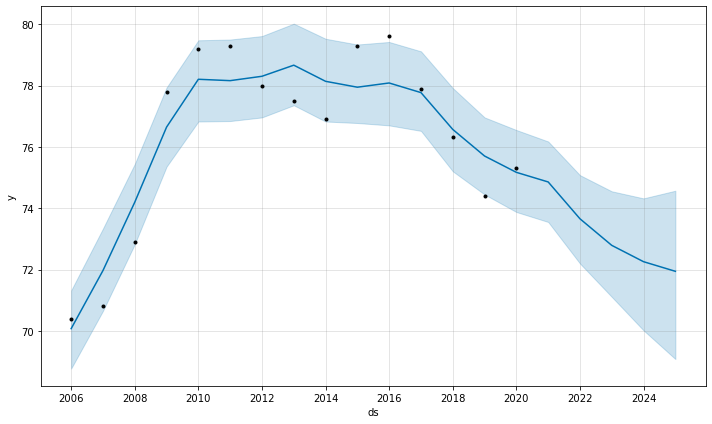

In [105]:
model1.plot(forecast1);

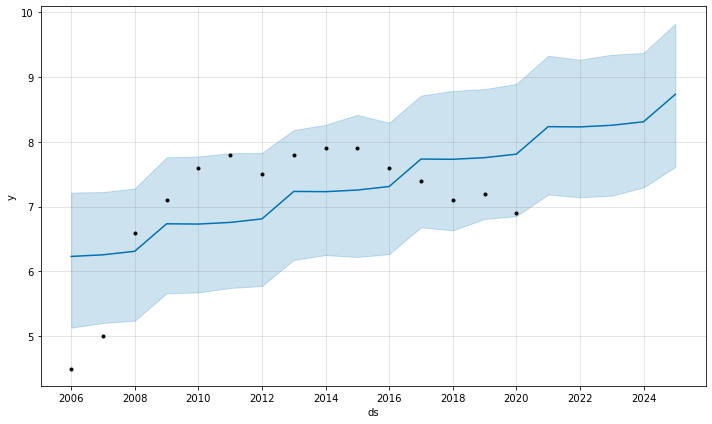

In [106]:
modelc1.plot(forecastc1);

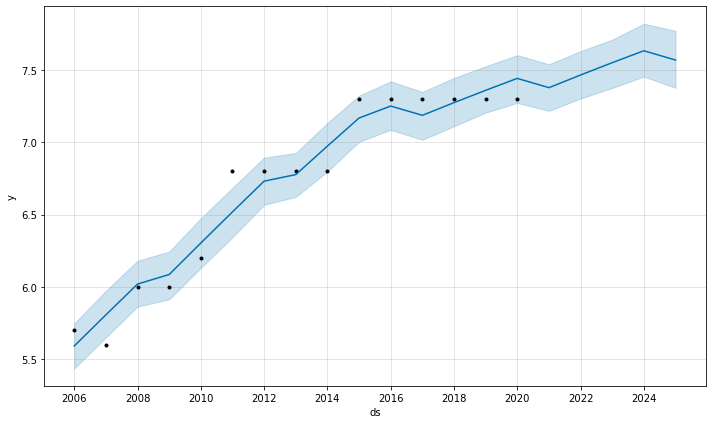

In [107]:
modelc2.plot(forecastc2);

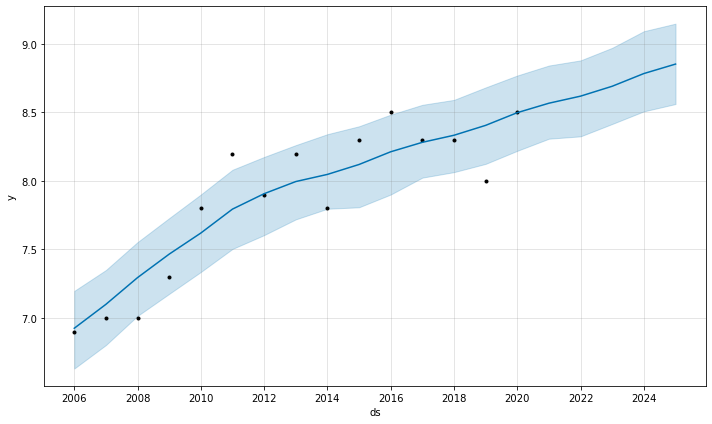

In [108]:
modelc3.plot(forecastc3);

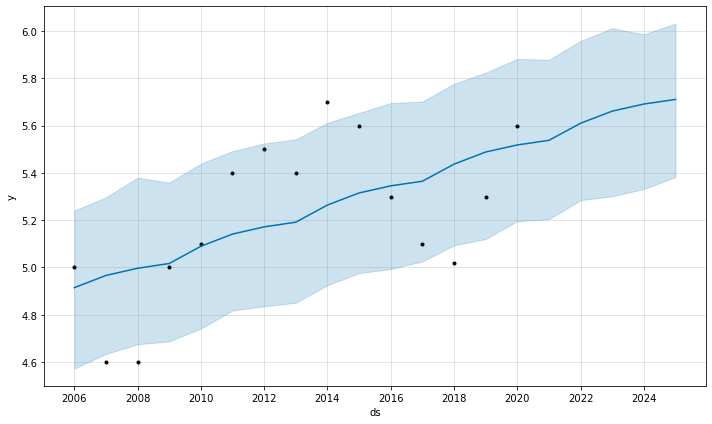

In [109]:
modele1.plot(forecaste1);

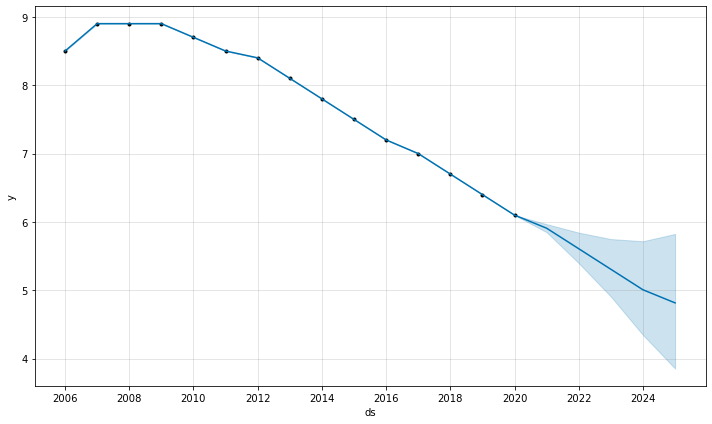

In [110]:
modele2.plot(forecaste2);

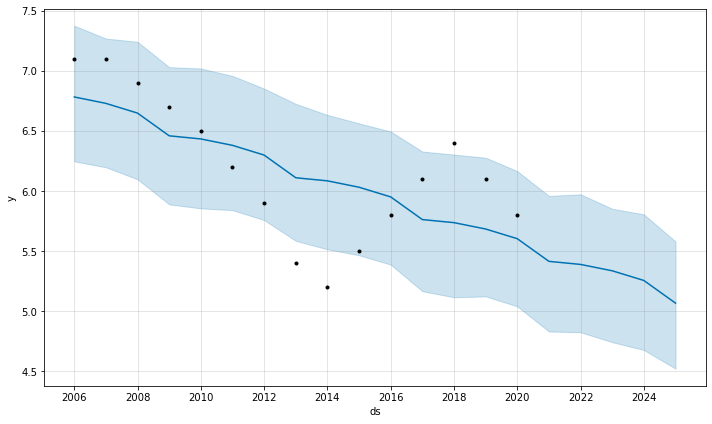

In [111]:
modele3.plot(forecaste3);

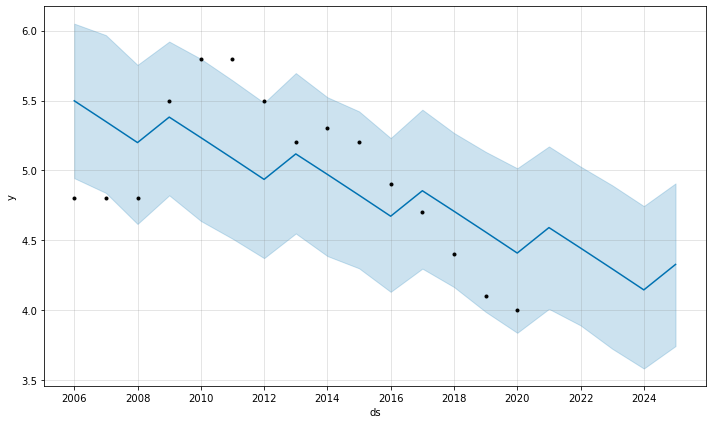

In [112]:
modelp1.plot(forecastp1);

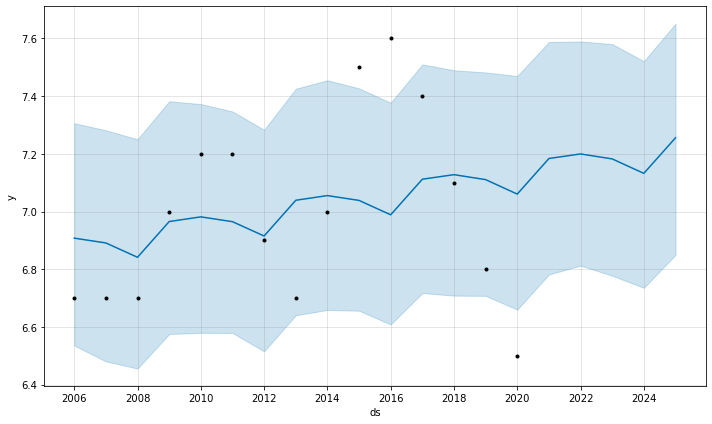

In [113]:
modelp2.plot(forecastp2);

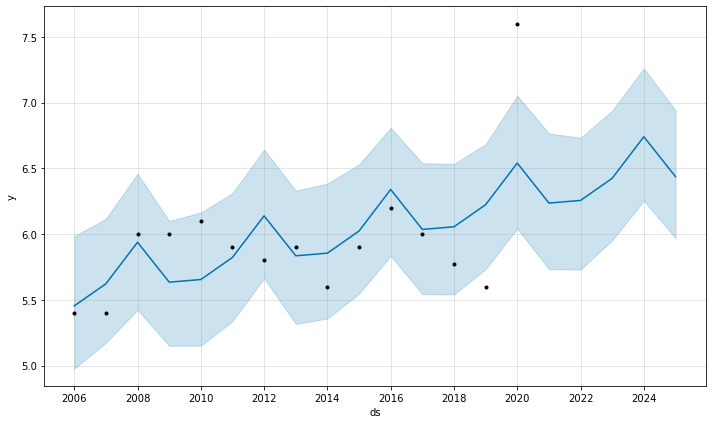

In [114]:
modelp3.plot(forecastp3);

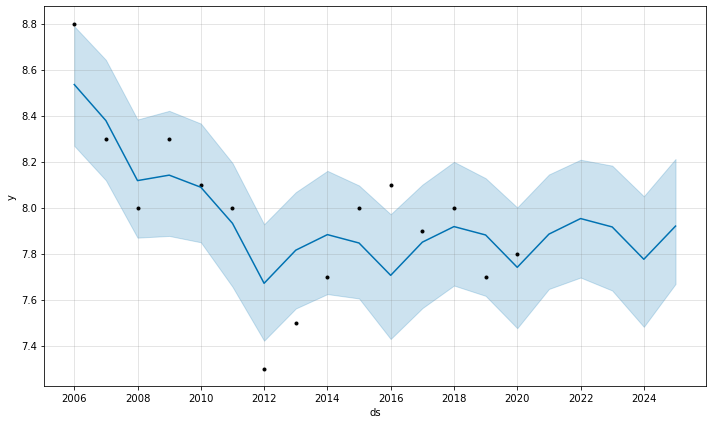

In [115]:
models1.plot(forecasts1);

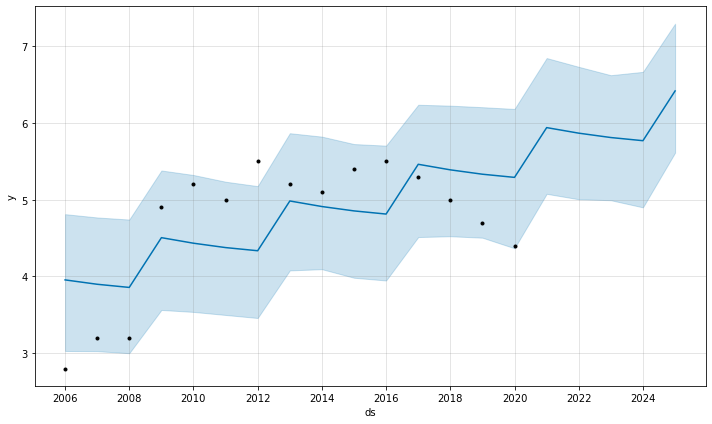

In [116]:
models2.plot(forecasts2);

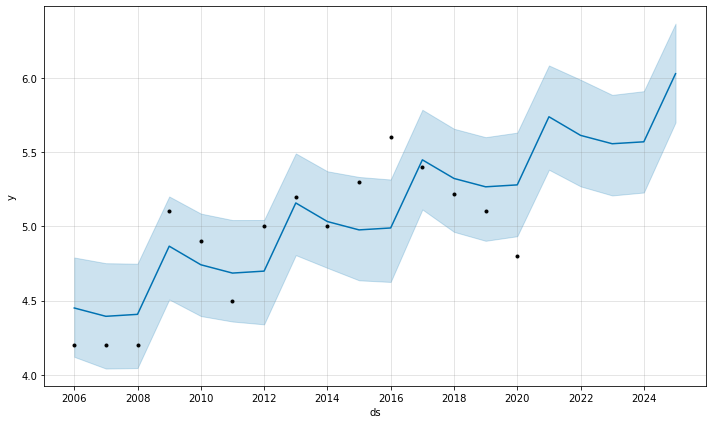

In [117]:
modelx1.plot(forecastx1);

<AxesSubplot:xlabel='ds'>

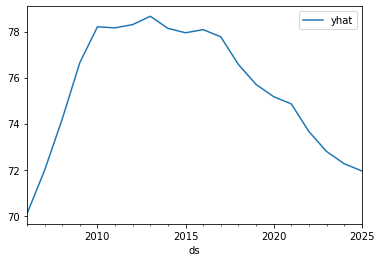

In [118]:
forecast1.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

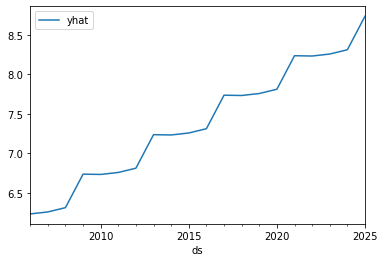

In [119]:
forecastc1.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

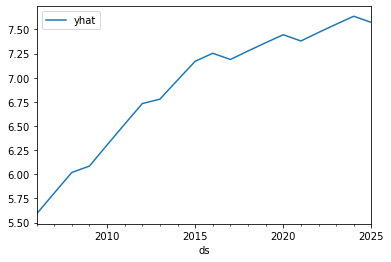

In [120]:
forecastc2.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

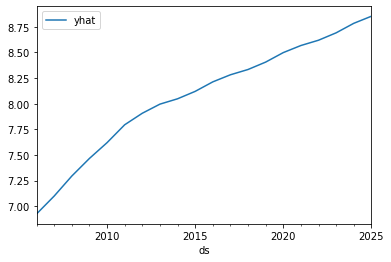

In [121]:
forecastc3.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

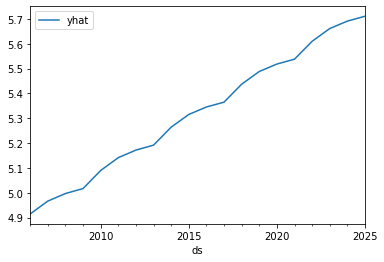

In [122]:
forecaste1.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

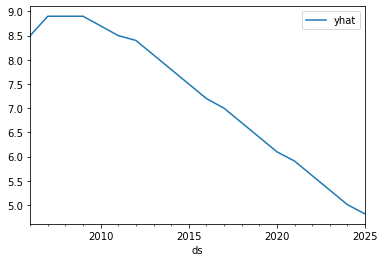

In [123]:
forecaste2.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

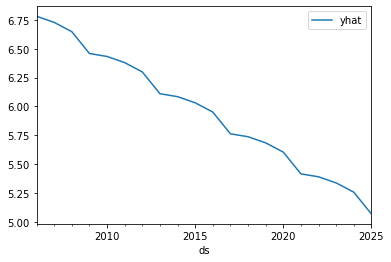

In [124]:
forecaste3.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

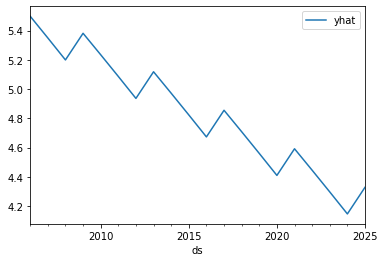

In [125]:
forecastp1.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

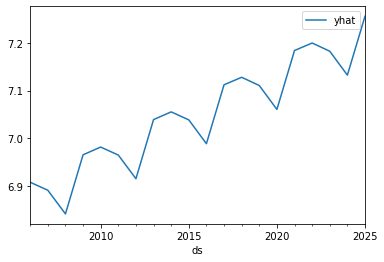

In [126]:
forecastp2.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

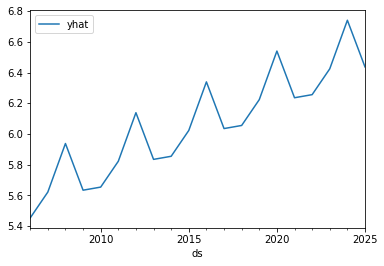

In [127]:
forecastp3.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

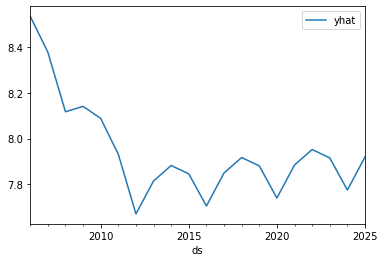

In [128]:
forecasts1.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

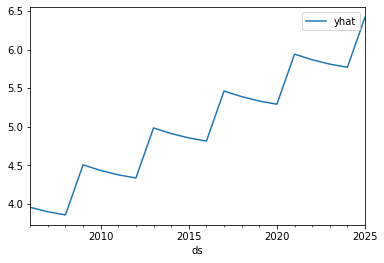

In [129]:
forecasts2.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

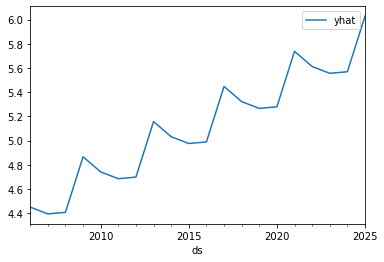

In [130]:
forecastx1.plot(x='ds',y='yhat')

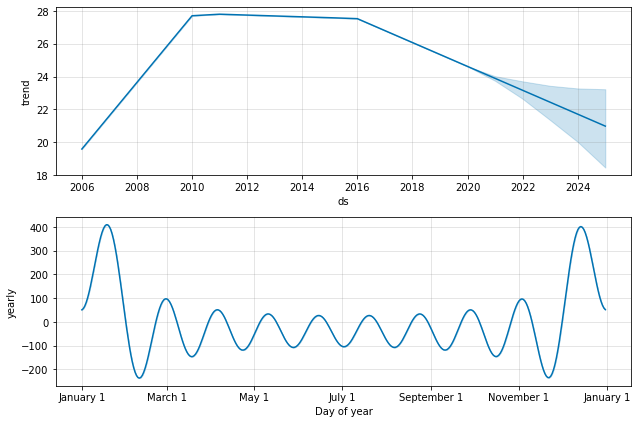

In [131]:
model1.plot_components(forecast1);

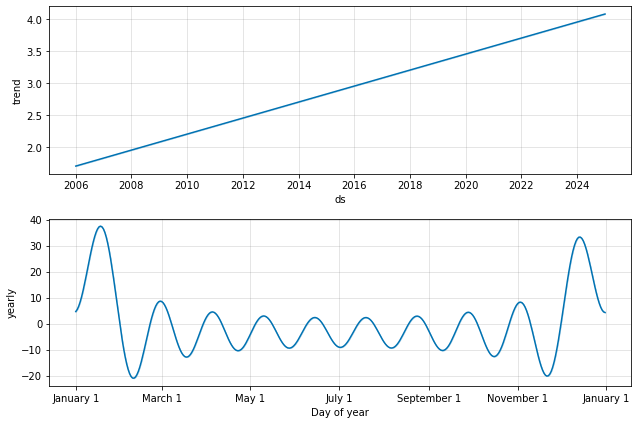

In [132]:
modelc1.plot_components(forecastc1);

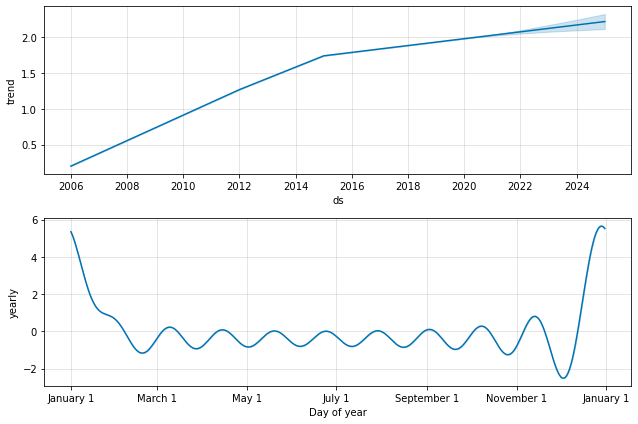

In [133]:
modelc2.plot_components(forecastc2);

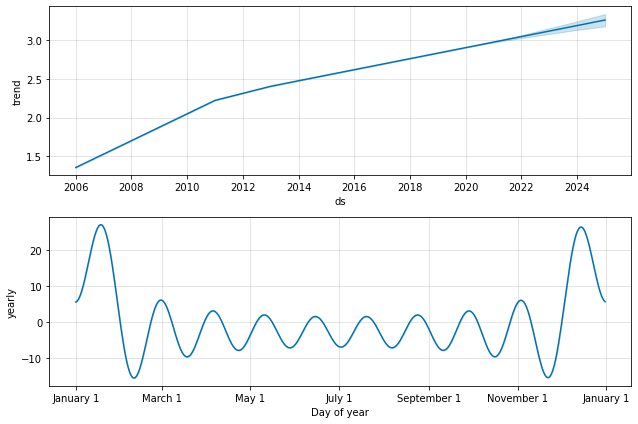

In [134]:
modelc3.plot_components(forecastc3);

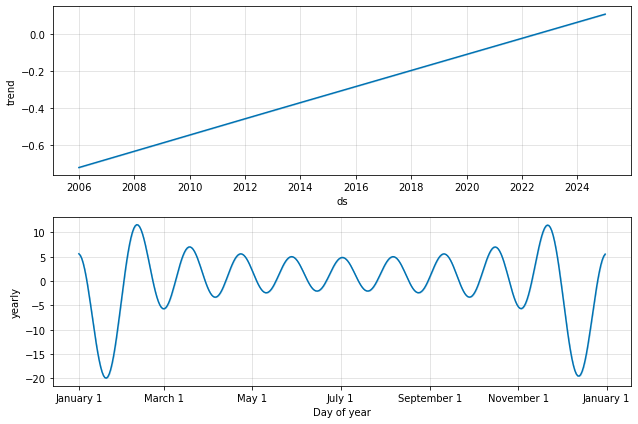

In [135]:
modele1.plot_components(forecaste1);

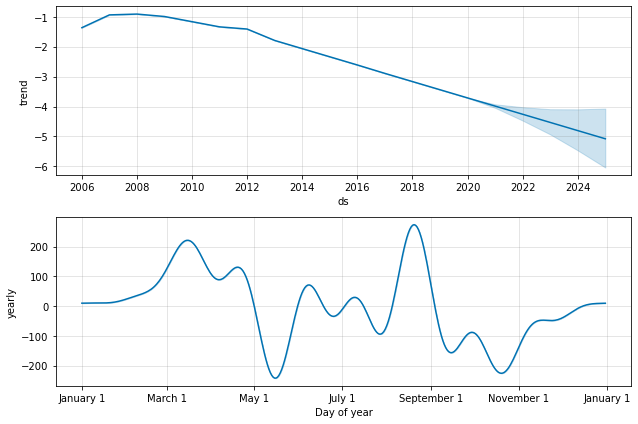

In [136]:
modele2.plot_components(forecaste2);

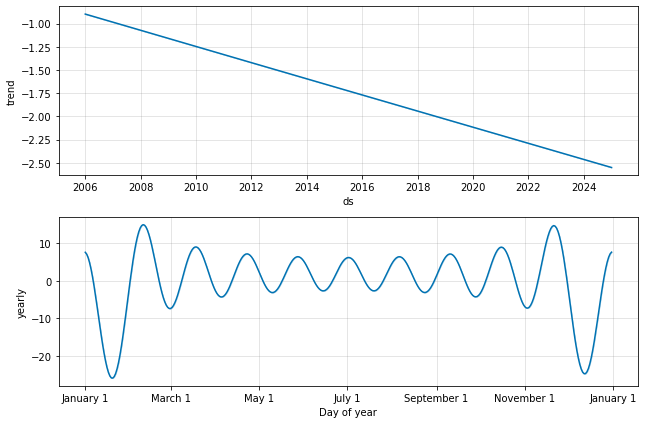

In [137]:
modele3.plot_components(forecaste3);

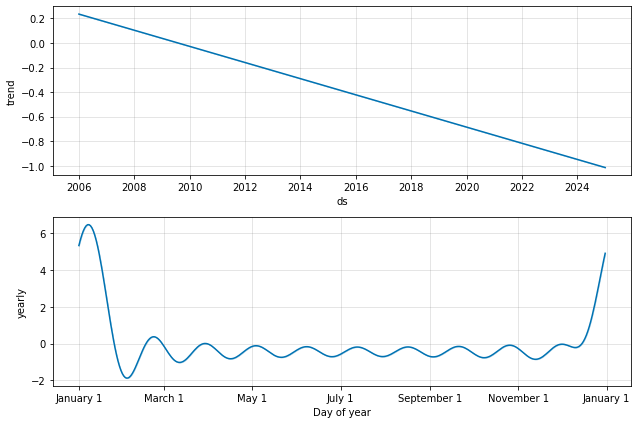

In [138]:
modelp1.plot_components(forecastp1);

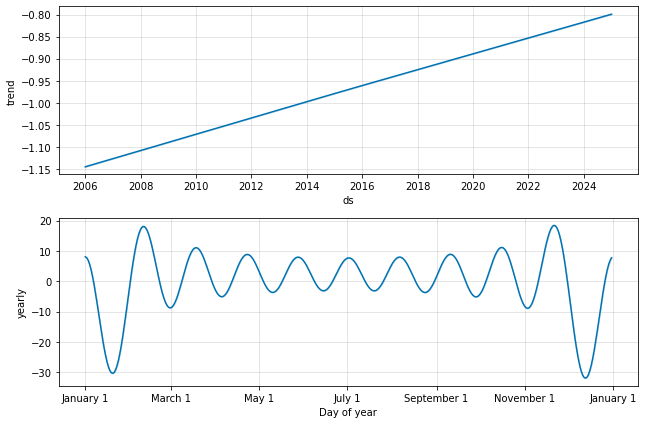

In [139]:
modelp2.plot_components(forecastp2);

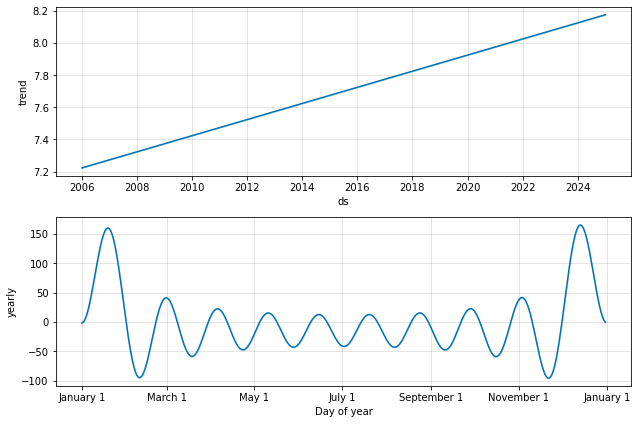

In [140]:
modelp3.plot_components(forecastp3);

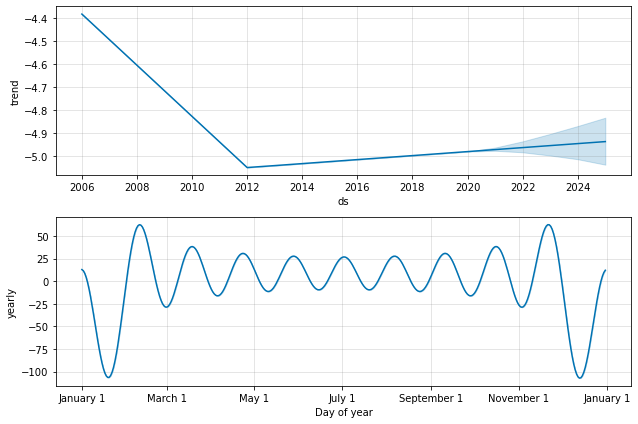

In [141]:
models1.plot_components(forecasts1);

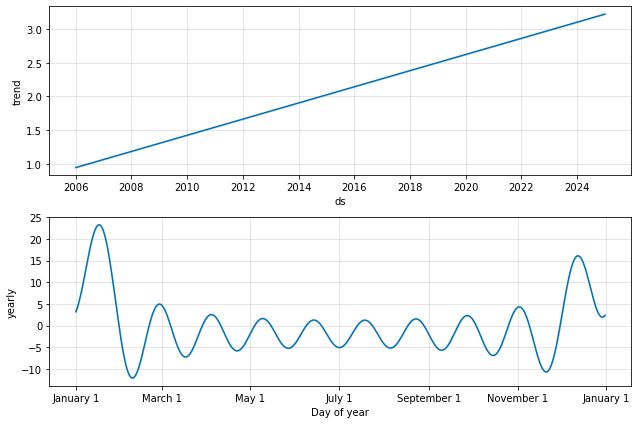

In [142]:
models2.plot_components(forecasts2);

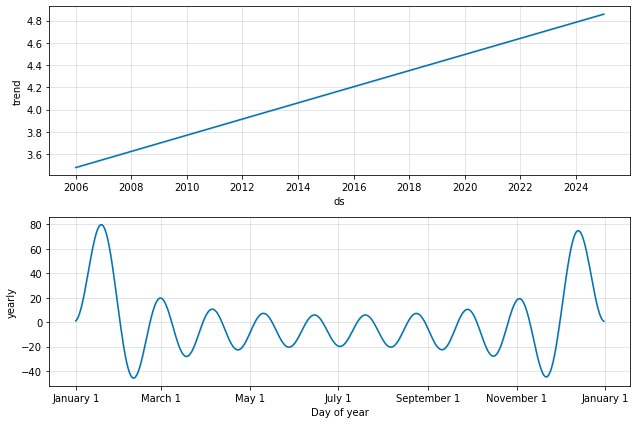

In [143]:
modelx1.plot_components(forecastx1);